In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sys import path
path.append('..')
from oasis.functions import gen_data, gen_sinusoidal_data, deconvolve, estimate_parameters
from oasis.plotting import simpleaxis
from oasis.oasis_methods import oasisAR1, oasisAR2

In [17]:
single_trace = pd.read_excel('Book1.xlsx', header=None, dtype=np.float32)

In [18]:
scaler = preprocessing.StandardScaler()
zscore_trace = scaler.fit_transform(single_trace, [0, 1])

In [30]:
zscore_trace = pd.DataFrame(zscore_trace)[0].values

[[ 0.1684426 ]
 [ 0.21047476]
 [ 0.2800377 ]
 ...
 [-0.3324779 ]
 [-0.36017808]
 [-0.33544773]]


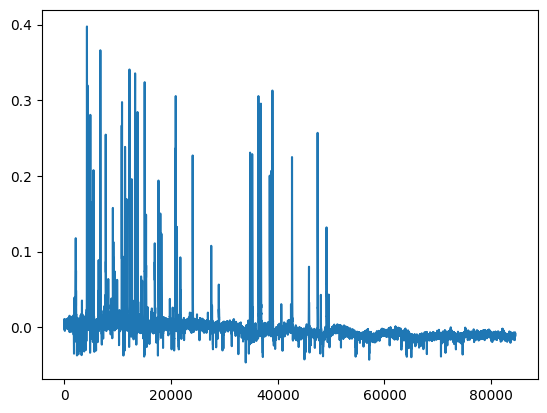

In [20]:

plt.plot(single_trace)

In [66]:
denoised_signal, spikes, baseline, params, lam = deconvolve(zscore_trace, g=(None,None), penalty=0, optimize_g=5, max_iter=5)

C:\Users\Austin-PC\AppData\Local\mambaforge\envs\oasis\lib\site-packages\oasis\functions.py:171: UserWarning: Optimization of AR parameters is already fairly stable for AR(1), but slower and more experimental for AR(2)
  warn("Optimization of AR parameters is already fairly stable for AR(1), "


In [127]:
spikes_loc = np.nonzero(spikes)[0]

In [225]:
from scipy.stats import gaussian_kde
kde = gaussian_kde(spikes_loc)
kde.set_bandwidth(0.001)

In [226]:
vals = kde.evaluate(spikes_loc)

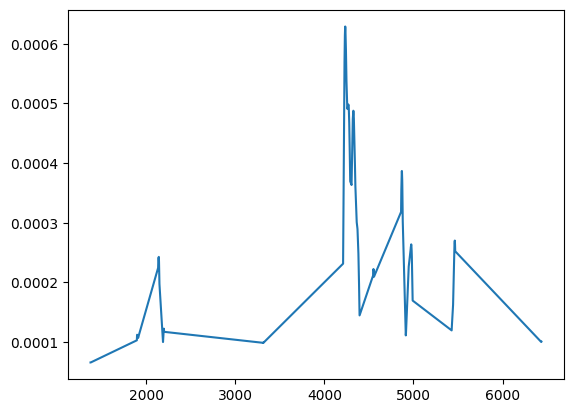

In [232]:
plt.plot(spikes_loc[:150], vals[:150])

In [184]:
clusters = []
a = .005

cluster = []
for i in range(10):
    spike1 = spikes_loc[i]
    spike2 = spikes_loc[i+1]
    print([spike1, spike2])
    if len(cluster) == 0:
        cluster.append(spike1)

    diff = abs(spike1-spike2)
    minima = min(cluster, spike2)
    percent_change = diff/minima
    print(f'%Change: {percent_change*100}')
    
    if percent_change > a:
        cluster.append(spike1)
        clusters.append(cluster)
        cluster=[]
    

[1374, 1376]
%Change: [0.14556041]
[1376, 1894]
%Change: [37.70014556]
[1894, 1897]
%Change: [0.15839493]
[1897, 1907]
%Change: [0.5279831]
[1907, 1908]
%Change: [0.05243838]
[1908, 2133]
%Change: [11.7986366]
[2133, 2134]
%Change: [0.04688233]
[2134, 2135]
%Change: [0.04688233]
[2135, 2136]
%Change: [0.04688233]
[2136, 2141]
%Change: [0.23441163]


In [178]:
binned_spikes = np.mean(clusters, axis=1)

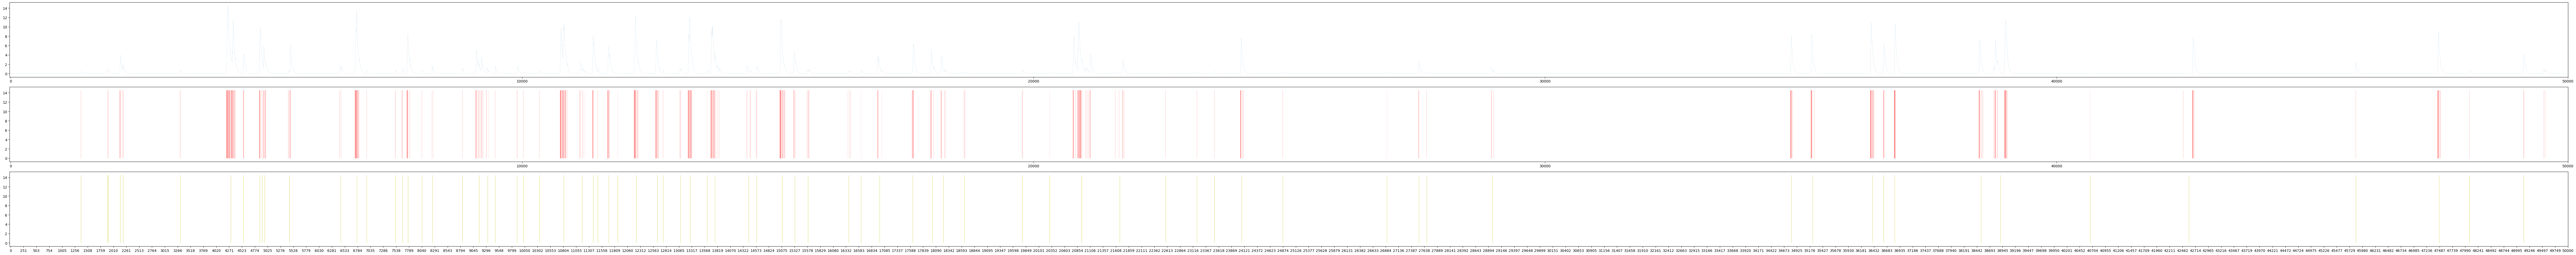

In [186]:
fig, ax = plt.subplots(3, figsize=(100, 10))
ax[0].plot(denoised_signal, linewidth=0.1)
#ax[1].hist(binned_spikes, bins=1000, color='g')
ax[1].vlines(spikes_loc, color='red', linewidth = 0.1, ymin=baseline, ymax=max(denoised_signal))
ax[2].vlines(binned_spikes, color='y', linewidth = 0.5, ymin=baseline, ymax=max(denoised_signal))

ax[0].set_xlim(-20, 50000)
ax[1].set_xlim(-20, 50000)
ax[2].set_xlim(-20, 50000)
#ax[3].set_xlim(-20, 50000)
plt.xticks(np.linspace(0,50000, 200))
plt.tight_layout()
fig.savefig('DeconvolutionTest4.pdf')